In [54]:
pip install ucimlrepo

In [55]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print("Meta Data\n",adult.metadata)

# variable information
print("Variables\n",adult.variables)


Meta Data
 {'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following condit

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.concat([X, pd.DataFrame(y, columns=['income'])],axis=1)


In [58]:
df.shape

(48842, 15)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [60]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
46993,39,Private,65624,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,<=50K.
1442,36,Private,336595,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
43521,35,Private,20308,Some-college,10,Separated,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K.
25396,34,Local-gov,325792,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20238,21,Private,40767,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [61]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [62]:
df['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [63]:
df['income'].replace({'<=50K.':'<=50K', '>50K.': '>50K'}, inplace = True)

df.replace({'?': np.nan, ' ?': np.nan, '? ': np.nan, ' ? ': np.nan}, inplace = True)


In [64]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [65]:
# Find rows with missing values
missing_values = df[df.isnull().any(axis=1)]

print("Rows with missing values\n", missing_values)


Rows with missing values
        age  workclass  fnlwgt     education  education-num  \
14      40    Private  121772     Assoc-voc             11   
27      54        NaN  180211  Some-college             10   
38      31    Private   84154  Some-college             10   
51      18    Private  226956       HS-grad              9   
61      32        NaN  293936       7th-8th              4   
...    ...        ...     ...           ...            ...   
48769   21        NaN  212661  Some-college             10   
48800   73        NaN  144872       HS-grad              9   
48812   81        NaN   26711     Assoc-voc             11   
48826   50  Local-gov  139347       Masters             14   
48838   64        NaN  321403       HS-grad              9   

              marital-status      occupation    relationship  \
14        Married-civ-spouse    Craft-repair         Husband   
27        Married-civ-spouse             NaN         Husband   
38        Married-civ-spouse         

In [66]:
print("Missing Values ")
df.isna().sum()


Missing Values 


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [67]:
# replacing NaN values with the mode of respective columns
for column in df.columns:
  mode_value = df[column].mode()[0]
  df[column].fillna(mode_value, inplace = True)

print ("DataFrame after replacing NaN with Mode\n", df)


DataFrame after replacing NaN with Mode
        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64           Private  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-mana

In [68]:
print("Missing Values")
print (df.isnull().sum())


Missing Values
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [69]:
# find duplicate values in the dataset
print (df[df.duplicated()])

       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  3677

In [70]:
# drop duplicates
df = df.drop_duplicates()

# find duplicate values in the dataset
print (df[df.duplicated()])


Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [71]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


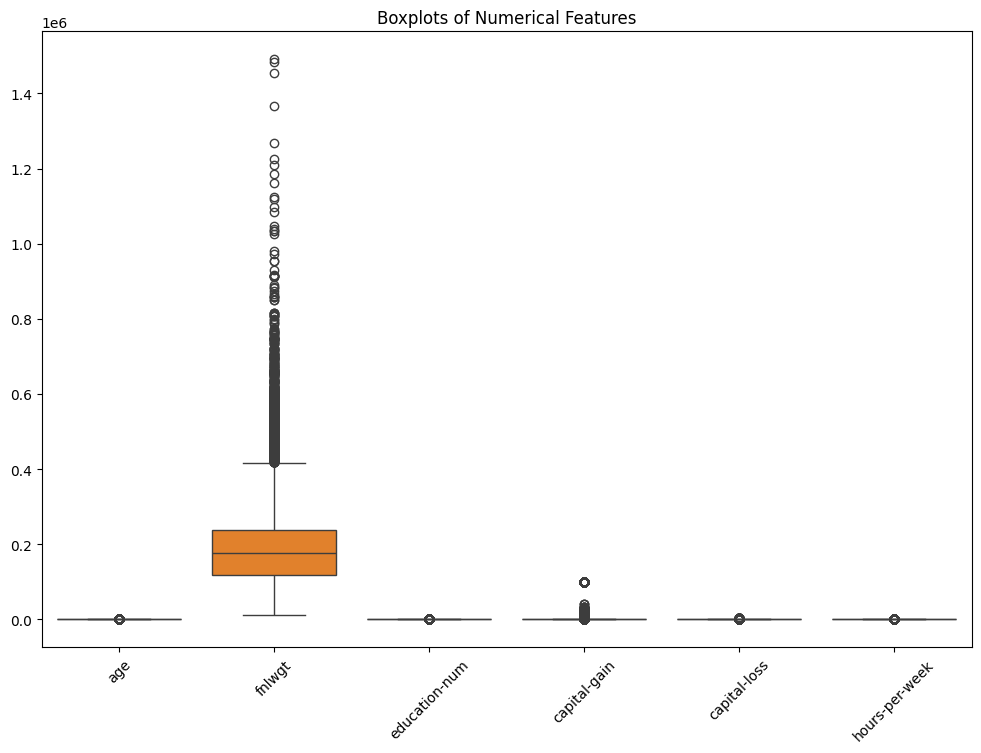

In [73]:
# Select numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Plot boxplots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_features)
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [74]:
# Define the lower and upper bounds for clipping
lower_bound = df['capital-gain'].quantile(0.05)  # Example: 5th percentile
upper_bound = df['capital-gain'].quantile(0.95)  # Example: 95th percentile

# Clip the 'capital-gain' variable
df['capital-gain_clipped'] = df['capital-gain'].clip(lower=lower_bound, upper=upper_bound)

# Check the summary statistics before and after clipping
print("Before Clipping:")
print(df['capital-gain'].describe())
print("\nAfter Clipping:")
print(df['capital-gain_clipped'].describe())


Before Clipping:
count    48789.000000
mean      1080.239829
std       7455.980728
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

After Clipping:
count    48789.000000
mean       350.580930
std       1216.850178
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5013.000000
Name: capital-gain_clipped, dtype: float64


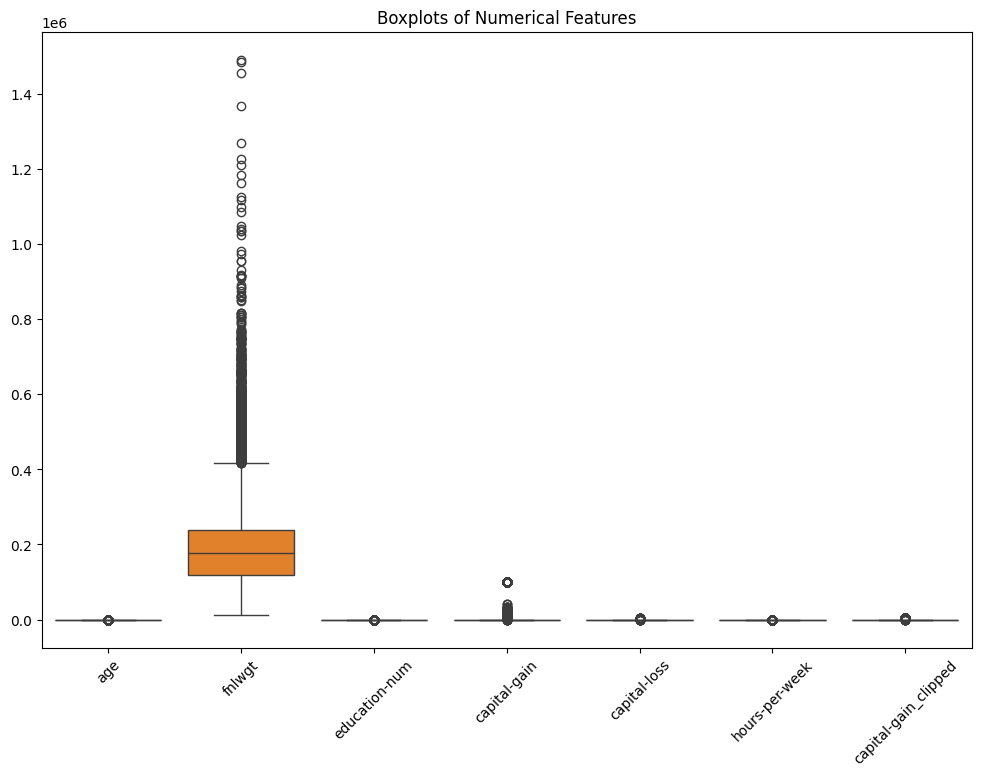

In [75]:
# Select numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Plot boxplots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_features)
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()